In [53]:
import numpy as np

In [6]:
import sys
sys.path.append('/Users/mariana/Documents/projects/Graphs/egnn')

In [7]:
import os
import json
import matplotlib.pyplot as plt

In [8]:
path = '/Users/mariana/Documents/projects/Graphs/EGNN_VAE/'

In [25]:

# c10 = 'nodes_10_community/exp_1/output.json'
base_pth = 'nodes_100_community/no_coord_dim3/output.json'
coord_pth = 'nodes_100_community/coord_dim3/output.json'

base = json.load(open(os.path.join(path, base_pth), 'r'))
coord = json.load(open(os.path.join(path, coord_pth), 'r'))

In [26]:
len(base['train']['epoch'])

250

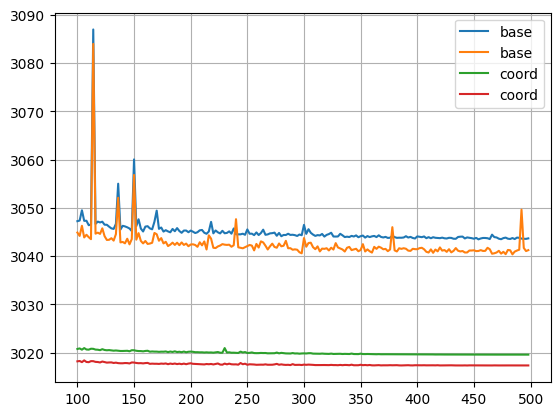

In [27]:
k = 50

plt.plot(base['train']['epoch'][k:], base['train']['loss'][k:], label='base')
plt.plot(base['val']['epoch'][k:], base['val']['loss'][k:], label='base')

plt.plot(coord['train']['epoch'][k:], coord['train']['loss'][k:], label='coord')
plt.plot(coord['val']['epoch'][k:], coord['val']['loss'][k:], label='coord')

plt.legend()
plt.grid()
plt.show()

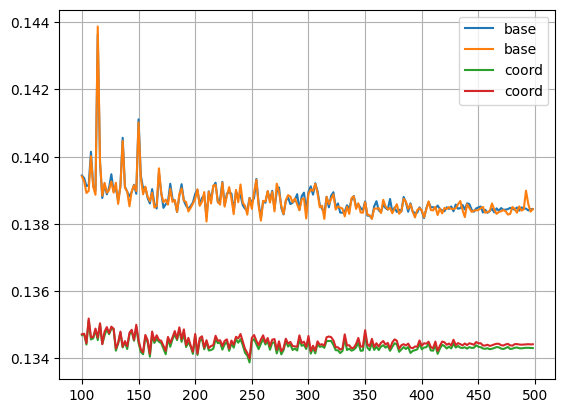

In [28]:
k = 50

plt.plot(base['train']['epoch'][k:], base['train']['adj_err'][k:], label='base')
plt.plot(base['val']['epoch'][k:], base['val']['adj_err'][k:], label='base')

plt.plot(coord['train']['epoch'][k:], coord['train']['adj_err'][k:], label='coord')
plt.plot(coord['val']['epoch'][k:], coord['val']['adj_err'][k:], label='coord')

plt.legend()
plt.grid()
plt.show()

In [29]:

# c10 = 'nodes_10_community/exp_1/output.json'
base_pth = 'nodes_100_erdos/no_coord_dim3/output.json'
coord_pth = 'nodes_100_erdos/coord_dim3/output.json'

base = json.load(open(os.path.join(path, base_pth), 'r'))
coord = json.load(open(os.path.join(path, coord_pth), 'r'))

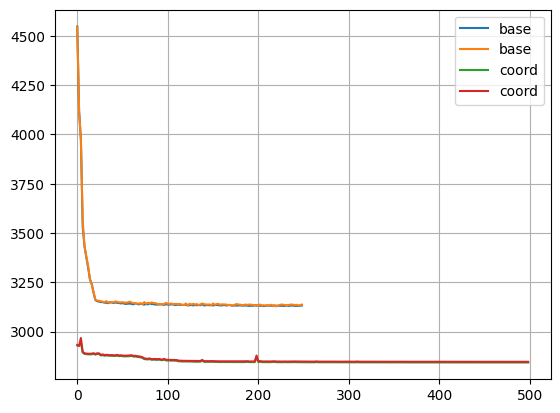

In [15]:
k = 0

plt.plot(base['train']['epoch'][k:], base['train']['loss'][k:], label='base')
plt.plot(base['val']['epoch'][k:], base['val']['loss'][k:], label='base')

plt.plot(coord['train']['epoch'][k:], coord['train']['loss'][k:], label='coord')
plt.plot(coord['val']['epoch'][k:], coord['val']['loss'][k:], label='coord')

plt.legend()
plt.grid()
plt.show()

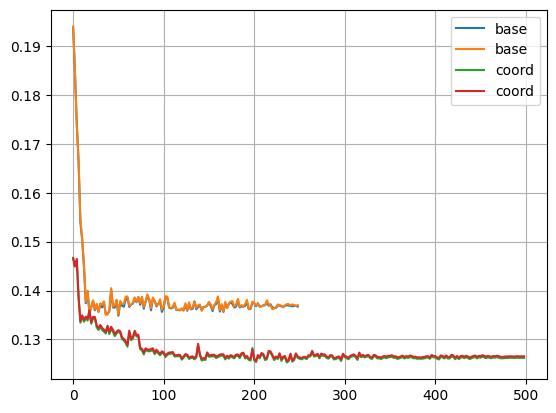

In [30]:
k = 0

plt.plot(base['train']['epoch'][k:], base['train']['adj_err'][k:], label='base')
plt.plot(base['val']['epoch'][k:], base['val']['adj_err'][k:], label='base')

plt.plot(coord['train']['epoch'][k:], coord['train']['adj_err'][k:], label='coord')
plt.plot(coord['val']['epoch'][k:], coord['val']['adj_err'][k:], label='coord')

plt.legend()
plt.grid()
plt.show()

In [22]:
base['train'].keys()

dict_keys(['epoch', 'loss', 'bce', 'kl', 'kl_coords', 'adj_err', 'wrong_edges', 'gt_edges', 'possible_edges', 'tp', 'fp', 'fn'])

In [34]:
# base['train']['wrong_edges']

In [35]:
path = '/Users/mariana/Documents/projects/Graphs/EGNN_VAE/nodes_20_community'
base_pth = os.path.join(path, 'base_dim3')
coor_pth = os.path.join(path, 'coord_dim3')

In [46]:
adj_errs, losses = [], []

for d in os.listdir(base_pth):
    path = os.path.join(base_pth, d)
    output = json.load(open(os.path.join(path, 'output.json'), 'r'))
    adj_err = (output['train']['adj_err'][-1], output['val']['adj_err'][-1])
    adj_errs.append(adj_err)
    loss = (output['train']['bce'][-1], output['val']['bce'][-1])
    losses.append(loss)

In [65]:
adj_errs_c, losses_c = [], []

for d in os.listdir(coor_pth):
    path = os.path.join(coor_pth, d)
    output = json.load(open(os.path.join(path, 'output.json'), 'r'))
    adj_err = (output['train']['adj_err'][-1], output['val']['adj_err'][-1])
    adj_errs_c.append(adj_err)
    loss = (output['train']['bce'][-1], output['val']['bce'][-1])
    losses_c.append(loss)

In [51]:
loss_tr, loss_val = zip(*losses)

In [54]:
loss_tr = np.array(loss_tr)
loss_val = np.array(loss_val)

In [55]:
aerr_tr, aerr_val = zip(*adj_errs)

In [56]:
aerr_tr = np.array(aerr_tr)
aerr_val = np.array(aerr_val)

In [66]:
loss_tr_c, loss_val_c = zip(*losses_c)

loss_tr_c = np.array(loss_tr_c)
loss_val_c = np.array(loss_val_c)

aerr_tr_c, aerr_val_c = zip(*adj_errs_c)

aerr_tr_c = np.array(aerr_tr_c)
aerr_val_c = np.array(aerr_val_c)

[Text(1, 0, 'base_train'),
 Text(2, 0, 'base_val'),
 Text(3, 0, 'coord_train'),
 Text(4, 0, 'coord_val')]

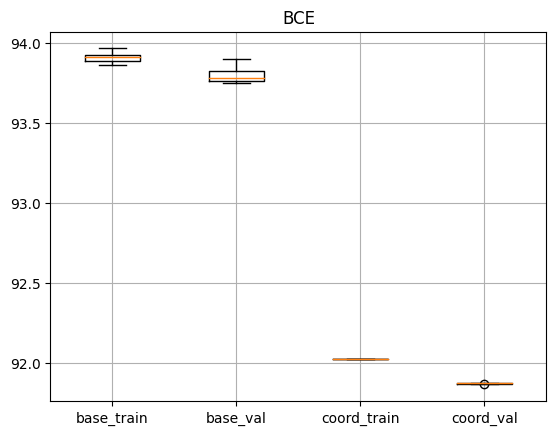

In [73]:
loss = {'base_train': loss_tr, 'base_val': loss_val, 'coord_train': loss_tr_c, 'coord_val': loss_val_c}

fig, ax = plt.subplots()
ax.boxplot(loss.values())
ax.grid()
ax.set_title('BCE')
ax.set_xticklabels(loss.keys())

[Text(1, 0, 'base_train'),
 Text(2, 0, 'base_val'),
 Text(3, 0, 'coord_train'),
 Text(4, 0, 'coord_val')]

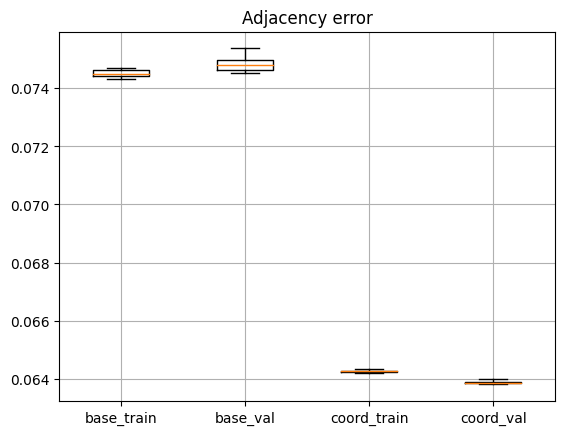

In [71]:
aerr = {'base_train': aerr_tr, 'base_val': aerr_val, 'coord_train': aerr_tr_c, 'coord_val': aerr_val_c}

fig, ax = plt.subplots()
ax.boxplot(aerr.values())
ax.grid()
ax.set_title('Adjacency error')
ax.set_xticklabels(aerr.keys())